<a id='main'></a>
# Unsupervised Summary

In unsupervised machine learning algorithms there is no known output. It is used to extract information from Data.
Here transformation of data and clustering will be themathized

In [1]:
#import base pacakges
import numpy as np
import matplotlib.pyplot as plt
import random as rand

### Sources:
* An Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O’Reilly). Copyright 2017 Sarah Guido and Andreas Müller, 978-1-449-36941-5.
* scikit-documentation: https://devdocs.io/scikit_learn/

## table of contents:
* [0. Datasets](#ch0)
    * diabetes and digits dataset of sklearn
* [1. k-nearast neighbors (knn)](#ch1)
    * For small datasets, good as a baseline, easy to explain. 
* [2.linear models](#ch2)
    * Go-to as a first algorithm to try, good for very large datasets, good for very highdimensional data. 
* [3. Naive Bayes](#ch3)
    * Only for classification. Even faster than linear models, good for very large datasets and high-dimensional data. Often less accurate than linear models. 
* [4. Decision Trees](#ch4)
    * Very fast, don’t need scaling of the data, can be visualized and easily explained.
* [5. Random Trees](#ch5)
    * In regards of classification and regression among the most widely used algorithms. Nearly always perform better than a single decision tree, very robust and powerful. Don’t need scaling of data. Not good for very high-dimensional sparse data. 

* [6. Gradient boosted regression trees (gradient boosting machines)](#ch6)
    * Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.
* [7. Support vector machines](#ch7)
    * Go-to as a first algorithm to try, good for very large datasets, good for very highdimensional data. 
* [8. Neural Networks (deep learning)](#ch8)
    * Can build very complex models, particularly for large datasets. Sensitive to scaling of the data (best mean=0 and std=1) and to the choice of parameters. Large models need a long time to train.

<a id='ch0'></a>
# Datasets

## Digits

In [2]:
#load dataset
from sklearn.datasets import load_digits
digits=load_digits()
print("digits.keys():\n", digits.keys())

digits.keys():
 dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [3]:
# data set description
i=70
print(digits['DESCR'][:i]+ "\n...") #increase i for more info

.. _digits_dataset:

Optical recognition of handwritten digits dataset
...


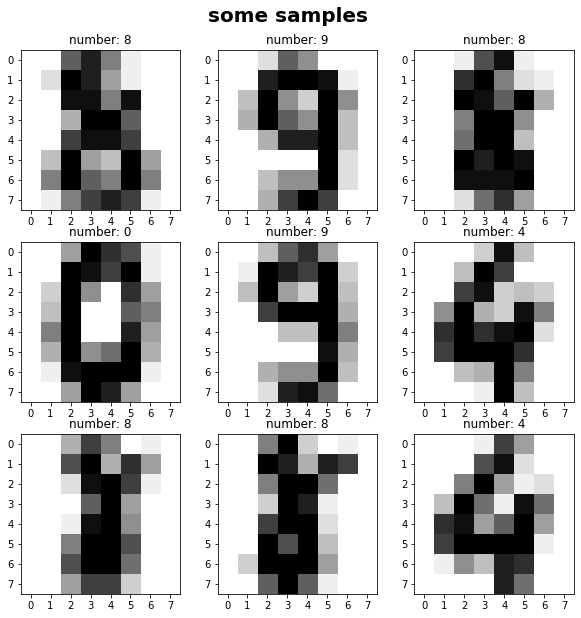

In [4]:
# plot samples
fig,axes =plt.subplots(3,3, figsize=(10, 10))
fig.suptitle('some samples', fontsize=20, fontweight='bold',y=.94)
for i,ax in zip(range(1,10),axes.ravel()):
    ax.xaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.yaxis.set_ticks(np.arange(0.,7.1, 1.))
    ax.imshow(digits.images[-i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("number: {:}".format(digits.target[-i]))

## Breast Cancer

In [5]:
#load dataset
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("digits.keys():\n", cancer.keys())

digits.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
# data set description
i=72
print(cancer['DESCR'][:i]+ "\n...") #increase i for more info

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
...


In [7]:
#amount of samples and features per sample
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [8]:
#target names
print("Target names:",cancer.target_names)

Target names: ['malignant' 'benign']


In [9]:
#sample counts per class
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [10]:
#splitting data in test and train datasets
from sklearn.model_selection import train_test_split
cla_X_train, cla_X_test, cla_y_train, cla_y_test = train_test_split(
    cancer['data'], cancer['target'], random_state=0) #random_state is seed for random number generation

## visualizing dataset and correlations through histogram

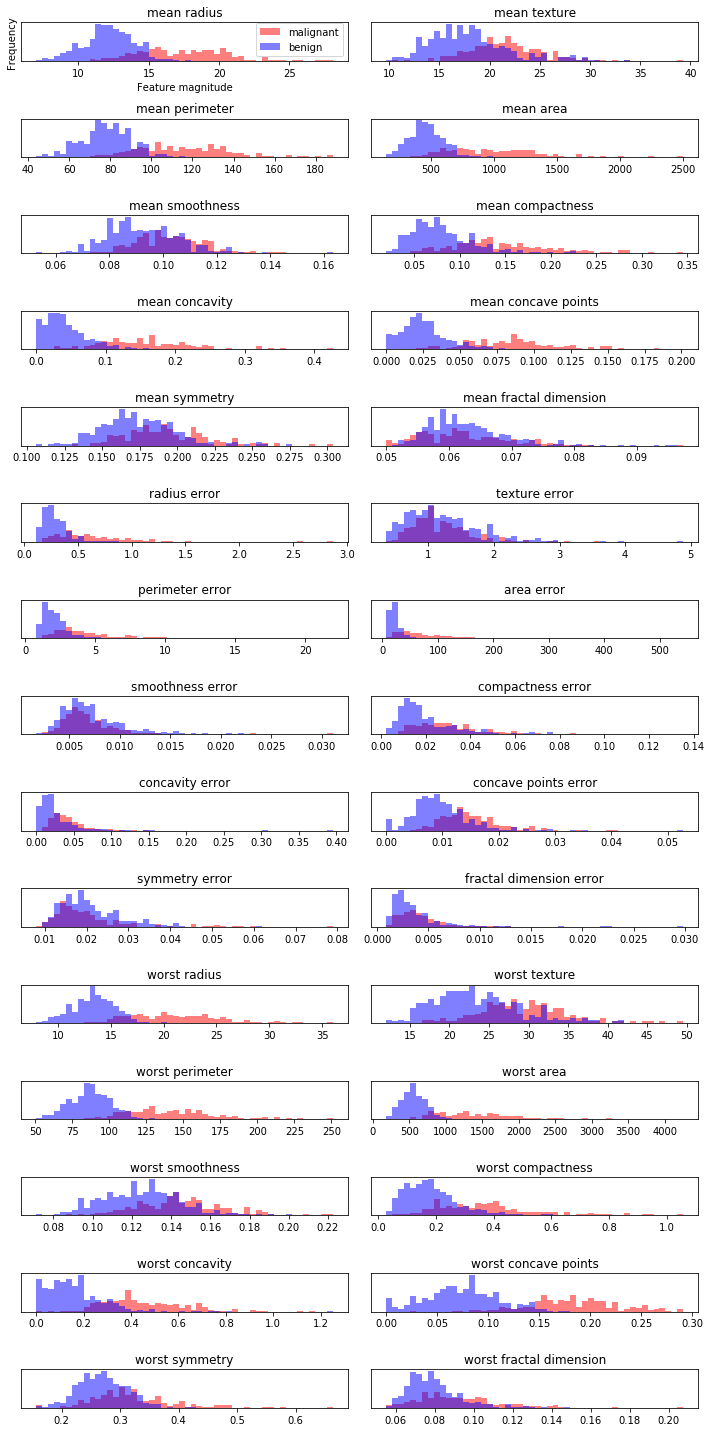

In [11]:
# from book "introduction to machine learning"

# seperation in the histrogram hints to important feature

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='red', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='blue', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

## Faces

In [12]:
# import
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

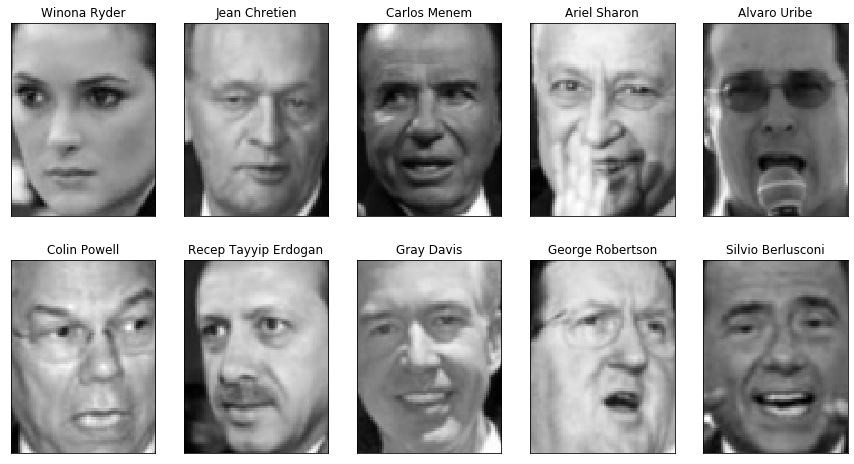

In [13]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image,cmap='gray')
    ax.set_title(people.target_names[target])

In [14]:
print("Number of classes: {}".format(len(people.target_names))) # number of classes = number of people
print("dataset.shape: {}".format(people.images.shape))

Number of classes: 62
dataset.shape: (3023, 87, 65)


In [15]:
# how often is each target represented
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [16]:
# filter faces with less than 20 pics
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale grey-scale values to be between 0 and 1 instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

In [17]:
#splitting data in test and train datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0) 
# random_state is seed for random number generation
# stratify makes sure that the class ratio is equal in train and test
people_shape=people.images[0].shape # for later use

## synthetic  signal dataset

In [18]:
# import
import random as rand
# functions
def sin_wave(X):
    return(2*np.sin(0.02*X)+3+1*np.random.uniform(-1, 1, size=(len(X))))
def shark_wave(X):
    return (0.015*X)%4+1+1*np.random.uniform(-1, 1, size=(len(X)))
def block_wave(X):
    return 4*np.round((0.002*X)%1)+1+1*np.random.uniform(-1, 1, size=(len(X)))

Text(0, 0.5, 'signal_value')

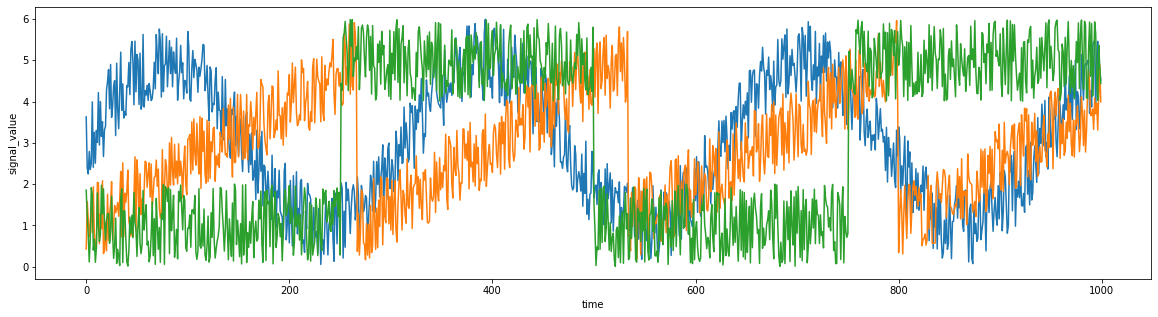

In [19]:
X= np.arange(0., 1000, 1)
synth_Y=np.array(list(map(list,zip(sin_wave(X),shark_wave(X),block_wave(X)))))
plt.figure(figsize=(20,5))
plt.plot(synth_Y)
plt.xlabel("time")
plt.ylabel("signal_value")

# Clustering Dataset

In [20]:
# function for generating synthetic 2D blobs
from sklearn.datasets import make_blobs
blobs, blobsy = make_blobs(random_state=3)

In [21]:
np.unique(blobsy) #show how many unique classes available

array([0, 1, 2])

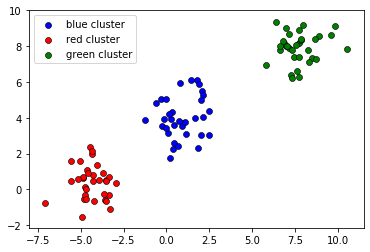

In [22]:
for i,col in enumerate(["blue","red","green"]):
    blobs_now=blobs[np.where(blobsy==i)]
    plt.scatter(blobs_now[:,0],blobs_now[:,1],color=col,label="{:} cluster".format(col),linewidth=0.6,edgecolors="black")
plt.legend()

In [23]:
# fewer blobs
few_blobs, few_blobsy = make_blobs(random_state=3,n_samples=13)

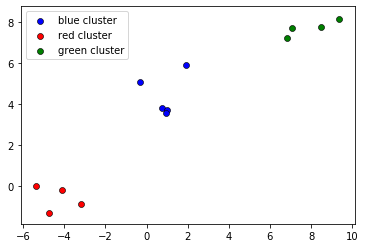

In [24]:
for i,col in enumerate(["blue","red","green"]):
    few_blobs_now=few_blobs[np.where(few_blobsy==i)]
    plt.scatter(few_blobs_now[:,0],few_blobs_now[:,1],color=col,label="{:} cluster".format(col),linewidth=0.6,edgecolors="black")
plt.legend()

In [25]:
# Dataset with important direction in kmeans chapter

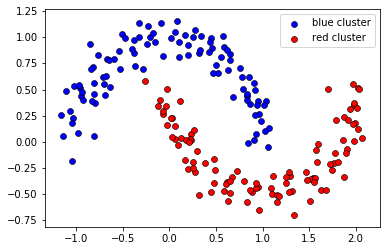

In [26]:
# moon datasets
from sklearn.datasets import make_moons
X_moon, y_moon = make_moons(n_samples=200, noise=0.1, random_state=0)

for i,col in enumerate(["blue","red"]):
    X_moon_new=X_moon[np.where(y_moon==i)]
    plt.scatter(X_moon_new[:,0],X_moon_new[:,1],color=col,label="{:} cluster".format(col),linewidth=0.6,edgecolors="black")
plt.legend()

<a id='ch1'></a>
# 1. Principal Component Analysis (PCA) [return to overview](#main)

### Commonly used for visualizing high dimensional datasets. Works by rotating datasets until the features are statistically uncorrelated. This is often followed by selecting only a subset of the dataset that is most important for explaining the data

In [27]:
# scale to mean=0, std=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=cancer.data
# fit scaling
scaler.fit(X)
# apply scaling
scaled_X=scaler.transform(X)

#PCA
from sklearn.decomposition import PCA
# n_components=amount of principal components
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(scaled_X)
# transform
pca_X = pca.transform(scaled_X)

In [28]:
# New shapes
print("Original shape: {}".format(str(scaled_X.shape)))
print("Reduced shape: {}".format(str(pca_X.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


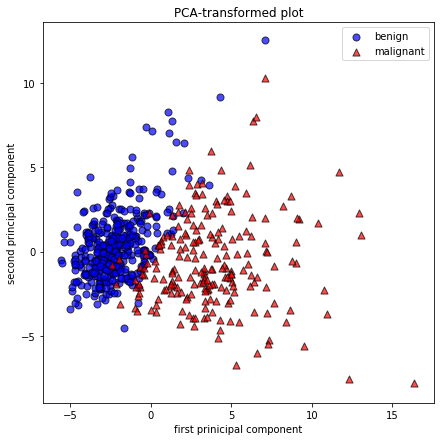

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
g1 = pca_X[np.where(cancer.target==1)]
g2 = pca_X[np.where(cancer.target==0)]

data = (g1, g2)
colors = ("blue","red")
groups = ("benign", "malignant")
markers = ("o","^")
# Create plot
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1, )

for data, color, group, marker in zip(data, colors, groups, markers):
    x =data[:,0]
    y =data[:,1]
    ax.scatter(x, y, alpha=0.7, c=color, edgecolors='black', s=50, label=group, marker=marker)

plt.title('PCA-transformed plot')
plt.xlabel("first prinicipal component")
plt.ylabel("second principal component")
plt.legend(loc="best")
plt.show()

In [30]:
# principal components composition
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0.5, 0, 'Feature')

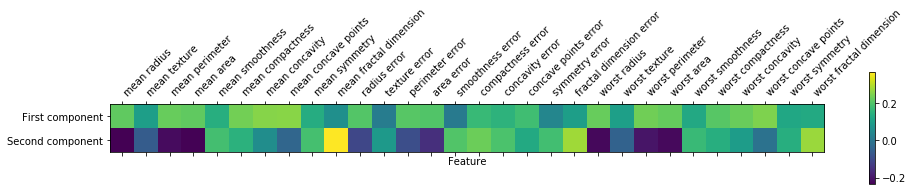

In [31]:
# visualize principal components
plt.matshow(pca.components_)
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=45, ha='left')
plt.xlabel("Feature")

#### Let´s see how knn classifies the faces without prior rescaling of the data.

In [32]:
# import
from sklearn.neighbors import KNeighborsClassifier
# apply
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.23


#### That's not too bad. Roughly estimated, the probability to be right by just guessing is 1/62 (1.16%). 

#### Now lets rescale the data by PCA and see how it fares.

In [33]:
# rescale
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test= pca.transform(X_test)
# apply
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(pca_X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(pca_X_test, y_test)))

Test set score: 0.31


#### The score has risen from 23% to 31%. This demonstrates that rescaling of data can improve accuracy.

In [34]:
print("Components shape:{}".format(pca.components_.shape)) #5655 is the amount of pixels (87*65)

Components shape:(100, 5655)


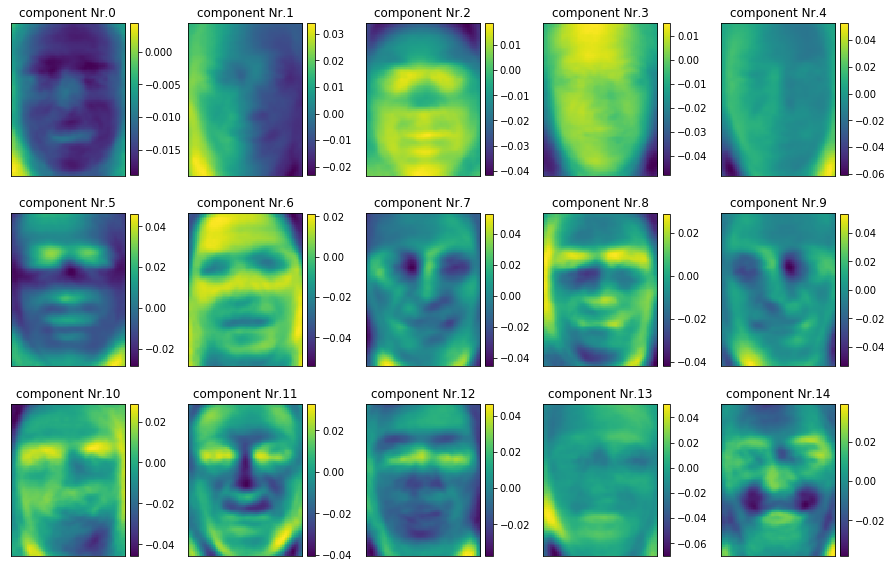

In [35]:
# plot components
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
plt.subplots_adjust(wspace=0.4, hspace=-0.3)
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    im=ax.imshow(component.reshape(people_shape),cmap='viridis')
    ax.set_title("component Nr.{}".format(i))
    fig.colorbar(im, ax=ax, fraction=0.06, pad=0.04)


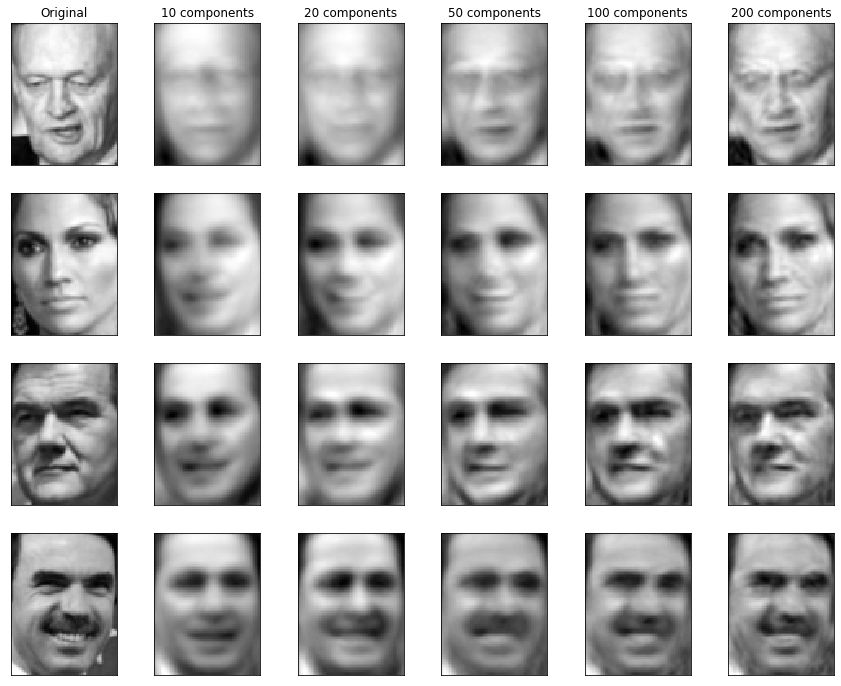

In [36]:
# define plot function
def plot_faces(show_faces, n_params):
    face_list_len=len(show_faces)
    if face_list_len<2 or len(n_params)<2:
        raise Exception("Please enter lists with more than one entry")
    fig,axes=plt.subplots(len(show_faces), len(n_params)+1, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
    # plot originals
    axes[0,0].set_title("Original")
    for ori in range(face_list_len):
        image=np.reshape(X_test[show_faces[ori]],people_shape)
        axes[ori,0].imshow(image,cmap='gray')
    # plot decomposed
    for i,n in enumerate(n_params):
        axes[0,i+1].set_title("{} components".format(n))
        pca = PCA(n_components=n, whiten=True, random_state=0).fit(X_train)
        pca_faces=pca.transform(X_test[show_faces])
        for j in range(face_list_len):
            image=pca.inverse_transform(pca_faces[j])
            axes[j,i+1].imshow(np.reshape(image,people_shape),cmap='gray')

# Input Data 
    # show which faces
show_faces=[0,1,3,4]
    # for which parameters
n_params=[10,20,50,100,200]
plot_faces(show_faces,n_params)

<a id='ch2'></a>
# 2.Non-Negative Matrix Factorization (NMF) [return to overview](#main)

### NMF works similarly as PCA, but with the constraint that all coefficients in the components must be non negative. Therefore the features of the dataset must also be non-negative. It can be used to reduce the dimension of problems as well.

#### NMF works well on Data with several independant sources in superposition (i.e several people speaking at once or a composition of musical instruments). It also easier to interpret than PCA

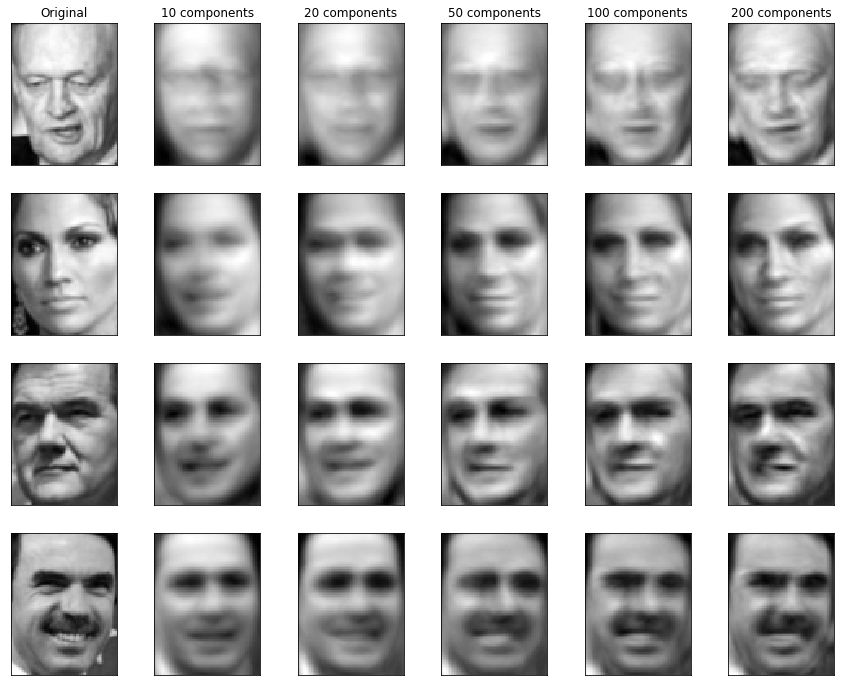

In [37]:
# import
from sklearn.decomposition import NMF
# define plot function
def plot_faces(show_faces, n_params):
    face_list_len=len(show_faces)
    if face_list_len<2 or len(n_params)<2:
        raise Exception("Please enter lists with more than one entry")
    fig,axes=plt.subplots(len(show_faces), len(n_params)+1, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
    # plot originals
    axes[0,0].set_title("Original")
    for ori in range(face_list_len):
        image=np.reshape(X_test[show_faces[ori]],people_shape)
        axes[ori,0].imshow(image,cmap='gray')
    # plot decomposed
    for i,n in enumerate(n_params):
        axes[0,i+1].set_title("{} components".format(n))
        nmf = NMF(n_components=n, random_state=0).fit(X_train)
        nmf_faces=nmf.transform(X_test[show_faces])
        for j in range(face_list_len):
            image=nmf.inverse_transform(nmf_faces[j])
            axes[j,i+1].imshow(np.reshape(image,people_shape),cmap='gray')

# Input Data 
    # show which faces
show_faces=[0,1,3,4]
    # for which parameters
n_params=[10,20,50,100,200]
plot_faces(show_faces,n_params)

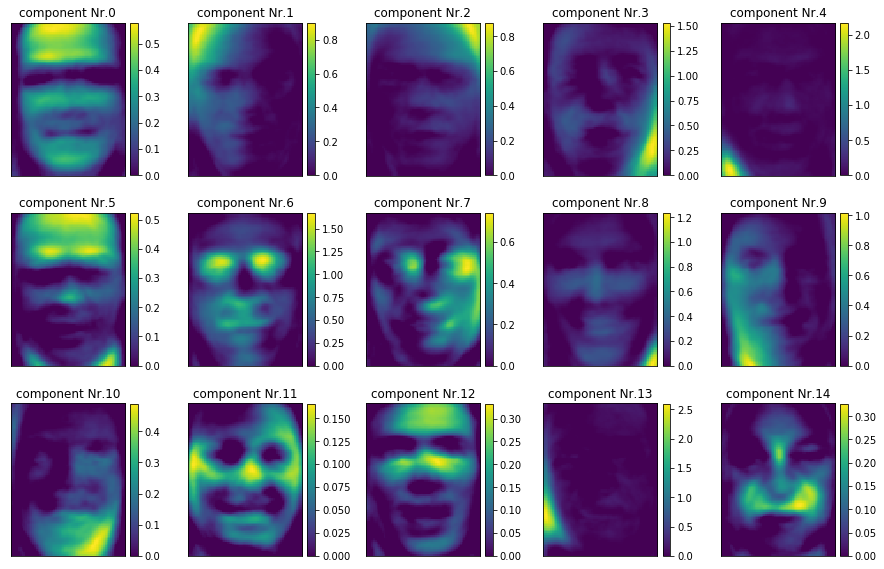

In [38]:
# import and apply
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0).fit(X_train)
#plot
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
plt.subplots_adjust(wspace=0.4, hspace=-0.3)
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    im=ax.imshow(component.reshape(people_shape),cmap='viridis')
    ax.set_title("component Nr.{}".format(i))
    fig.colorbar(im, ax=ax, fraction=0.06, pad=0.04)

#### component Nr.3 is facing right, while component Nr.7 is facing left. Let's see how this corresponds to the images

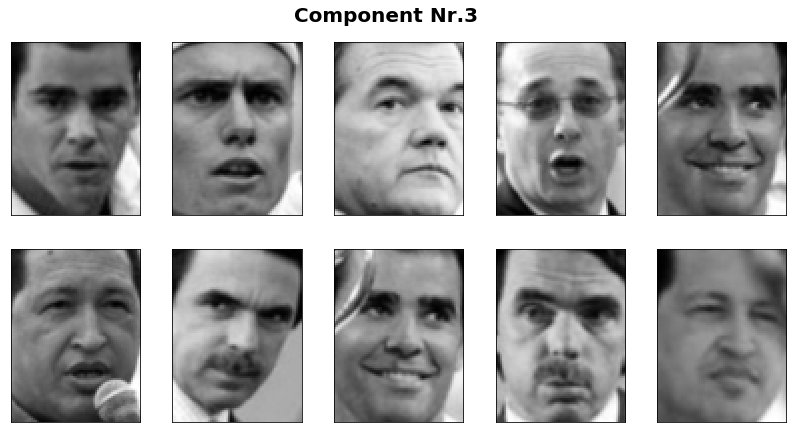

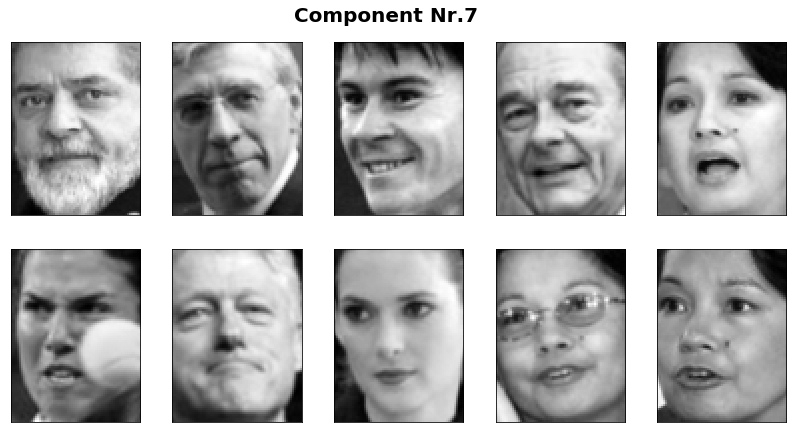

In [39]:
# component Nr.3
comp_nr=3
nmf_X_train=nmf.transform(X_train)
# plot
top_scores=np.argsort(nmf_X_train[:, comp_nr])[::-1][:10]
fig, axes = plt.subplots(2, 5, figsize=(14, 7), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('Component Nr.{}'.format(comp_nr), fontsize=20, fontweight='bold',y=.95)
for (top, ax) in zip(top_scores, axes.ravel()):
    ax.imshow(X_train[top].reshape(people_shape),cmap='gray')

    
# component Nr.7
comp_nr=7
nmf_X_train=nmf.transform(X_train)
# plot
top_scores=np.argsort(nmf_X_train[:, comp_nr])[::-1][:10]
fig, axes = plt.subplots(2, 5, figsize=(14, 7), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('Component Nr.{}'.format(comp_nr), fontsize=20, fontweight='bold',y=.95)
for (top, ax) in zip(top_scores, axes.ravel()):
    ax.imshow(X_train[top].reshape(people_shape),cmap='gray')

### As you can see, images scoring high on these components are facing the same direction.

### Now let's use NMF on our synthetic dataset

Text(0, 0.5, 'signal_value')

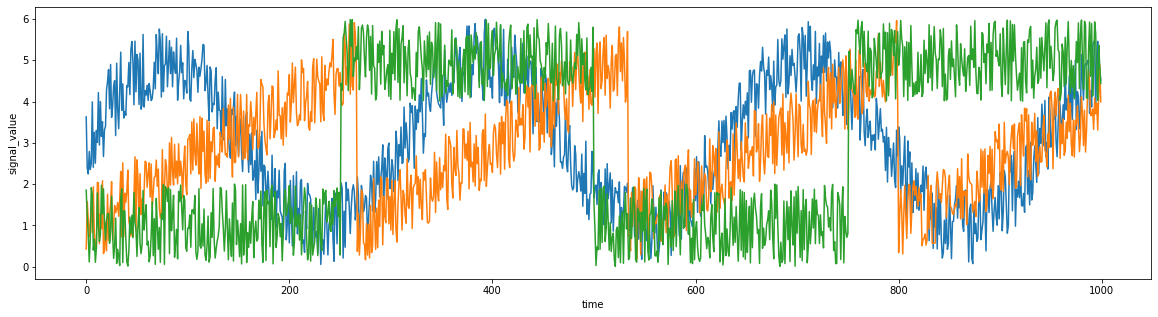

In [40]:
plt.figure(figsize=(20,5))
plt.plot(synth_Y)
plt.xlabel("time")
plt.ylabel("signal_value")

In [41]:
# Mix data into a 100 dimensional state
random_dim = np.random.RandomState(0).uniform(size=(100, 3)).T
scat_Y = np.dot(synth_Y, random_dim)

print("Shape of scat_Y:\n{}".format(scat_Y.shape))

Shape of scat_Y:
(1000, 100)


In [42]:
nmf = NMF(n_components=3, random_state=0)
nmf_Y= nmf.fit_transform(scat_Y)
print("Shape of nmf_Y:{}".format(nmf_Y.shape))
pca = PCA(n_components=3,random_state=0)
pca_Y= pca.fit_transform(scat_Y)
print("Shape of pca_Y:{}".format(pca_Y.shape))

Shape of nmf_Y:(1000, 3)
Shape of pca_Y:(1000, 3)


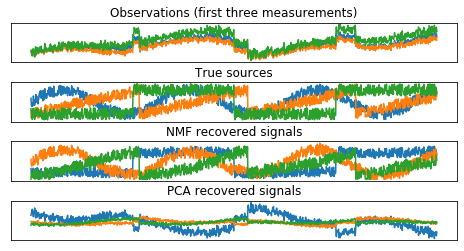

In [43]:
models = [scat_Y, synth_Y, nmf_Y, pca_Y] #note that the colors don't have to correspond to the original colours
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

### For more information about pattern extraction, it is recommended to inspect the sci kit_learn user guide on independant component analysis (ICA), factor analysis (FA) and sparse coding (dictionary learning)


<a id='ch3'></a>
# 3. Manifold Learning with t-SNE 

### As rotationg and rescaling data is a quite limited transformation. Manifold Learning algorithms are more suitable for visualization of compliacated data. They can only transform the data they were trained for, therefore they are used for analysis of data, but not for transforming data for supervised learning algorithms. As it is used for visualization, it rarely is used with more than two features.

### Particulary useful is t-SNE. It works by creating a random represantation of the data in 2d space. It moves samples that are close to each other in feature space closer and features that are fare from each other farther away.

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

Text(0, 0.5, 't-SNE feature 1')

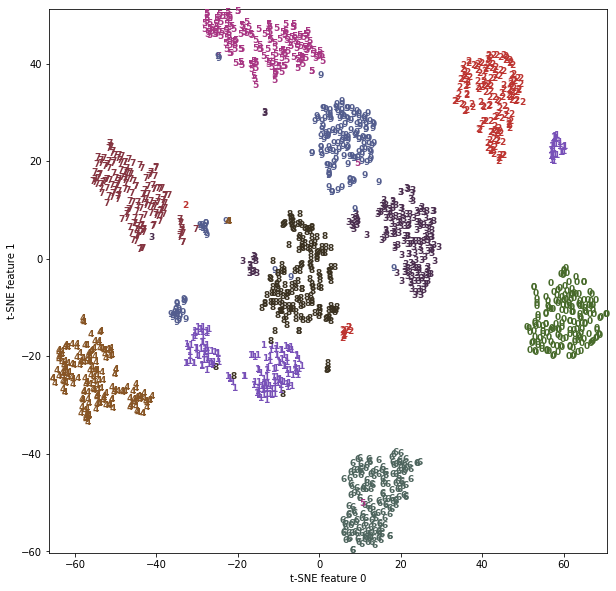

In [45]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

### Things seem more clustered now

# Clustering

### Clustering is for grouping and labeling samples according to their distance to each other in feature space.

#### How the Data looks to our algorithms:

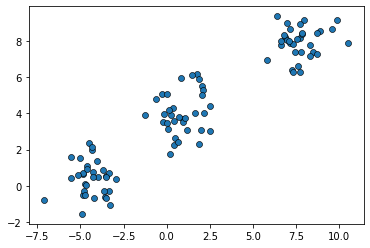

In [46]:
# blobs
plt.scatter(blobs[:,0],blobs[:,1],linewidth=0.6,edgecolors="black")

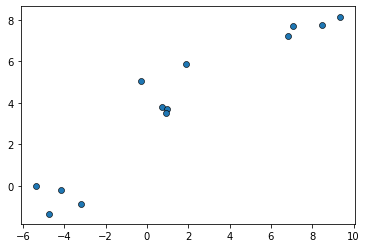

In [70]:
# few blobs
plt.scatter(few_blobs[:,0],few_blobs[:,1],linewidth=0.6,edgecolors="black")

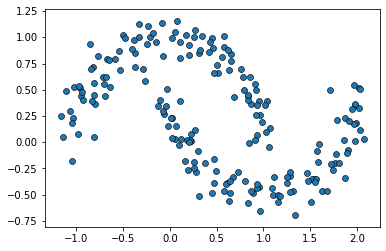

In [47]:
plt.scatter(X_moon[:,0],X_moon[:,1],linewidth=0.6,edgecolors="black")

<a id='ch4'></a>
# 4. k-means Clustering [return to overview](#main)

### The most simple and commonly used clustering algorithm. It works by first assigning points to the closest cluster center and then reassigning the cluster center as the means of the points it collects. The algorithm is completed, if points are no longer reassigned. It is relatively quickly and scales well with large datasets.

### It's weakness is, that it assumes all clusters to be similarly large, of convex shape and all directions being equally import. Therefore it often fails at complex shapes. It also depends on random initialization. By default ten different random initializations are carrier out and the best one is taken. Another downside is, that the amout of clusters has to be specified


### For very large datasets use scikit-learn's MiniBatchKMeans

In [48]:
from sklearn.cluster import KMeans

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(blobs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
print("cluster membership:\n{}".format(kmeans.labels_))

cluster membership:
[1 2 2 2 1 2 2 1 2 0 2 1 1 1 0 2 1 1 2 2 0 0 2 0 2 1 1 0 2 1 0 0 1 2 1 1 0
 0 0 1 1 1 0 0 2 2 0 2 1 2 0 1 2 1 2 1 2 1 0 0 0 2 0 0 2 0 1 2 0 2 2 1 0 2
 0 0 2 0 1 2 0 0 0 0 1 0 2 1 0 1 0 1 1 2 1 2 2 0 1 1]


cluster membership:
[1 1 0 0 0 0 0 0 0 0]


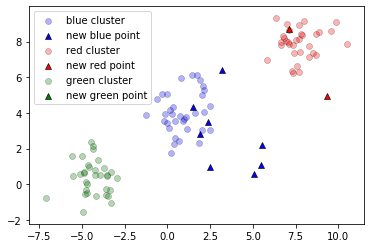

In [50]:
# It's also possible to assign new points a cluster via the predict function

new_points=np.random.rand(10,2)*10 #randomly generate new points
print("cluster membership:\n{}".format(kmeans.predict(new_points)))
# plot
for i,col in enumerate(["blue","red","green"]):
    blobs_now=blobs[np.where(kmeans.predict(blobs)==i)]
    plt.scatter(blobs_now[:,0],blobs_now[:,1],color=col,label="{:} cluster".format(col),alpha=0.3,linewidth=0.6,edgecolors="black")
    new_points_now=new_points[np.where(kmeans.predict(new_points)==i)]
    plt.scatter(new_points_now[:,0],new_points_now[:,1],color=col, label="new {:} point".format(col), marker='^',linewidth=0.6,edgecolors="black")
plt.legend()

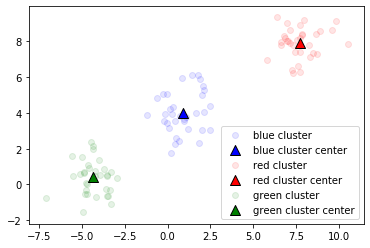

In [51]:
# plot cluster centers

cluster_centers=kmeans.cluster_centers_ #fetch cluster centers
# plot
for i,col in enumerate(["blue","red","green"]):
    blobs_now=blobs[np.where(kmeans.predict(blobs)==i)]
    plt.scatter(blobs_now[:,0],blobs_now[:,1],color=col,label="{:} cluster".format(col),alpha=0.1)
    cluster_centers_now=cluster_centers[np.where(kmeans.predict(cluster_centers)==i)]
    plt.scatter(cluster_centers_now[:,0],cluster_centers_now[:,1],color=col, label="{:} cluster center".format(col), marker='^',s=100, edgecolors="black")
plt.legend()

### Cases where kmeans doesn't perform well

<function matplotlib.pyplot.legend(*args, **kwargs)>

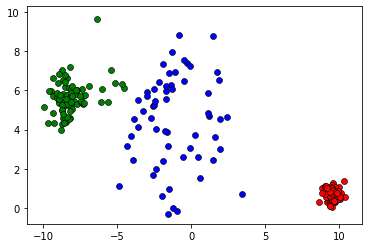

In [52]:
# fizzy code
X_fizzy, y_fizzy = make_blobs(n_samples=200,
                                cluster_std=[0.7, 2.5, 0.3],
                                random_state=7)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_fizzy)

cluster_centers=kmeans.cluster_centers_ #fecth cluster centers

for i,col in enumerate(["blue","red","green"]):
    X_fizzy_now=X_fizzy[np.where(y_pred==i)]
    plt.scatter(X_fizzy_now[:,0],X_fizzy_now[:,1],color=col,label="{:} cluster".format(col),alpha=1,linewidth=0.6,edgecolors="black")
plt.legend
# points of fizzy clusters are mislabeled

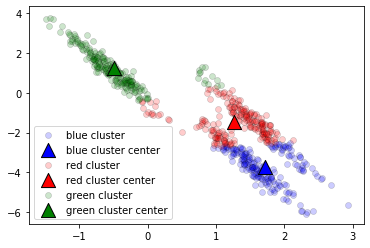

In [53]:
# data with important directions

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
key = np.random.RandomState(6)

# stretch data
transform = key.normal(size=(2, 2))
X = np.dot(X, transform)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
# fetch clusters
cluster_centers=kmeans.cluster_centers_

# plot the cluster membership
for i,col in enumerate(["blue","red","green"]):
    X_now=X[np.where(kmeans.predict(X)==i)]
    plt.scatter(X_now[:,0],X_now[:,1],color=col,label="{:} cluster".format(col),alpha=0.2,linewidth=0.6,edgecolors="black")
    cluster_centers_now=cluster_centers[np.where(kmeans.predict(cluster_centers)==i)]
    plt.scatter(cluster_centers_now[:,0],cluster_centers_now[:,1],
                color=col, label="{:} cluster center".format(col), marker='^',s=200,linewidths=1,edgecolors='black')
plt.legend()
# as you can see, it fails quite severly as it assumes all directions to be equally important

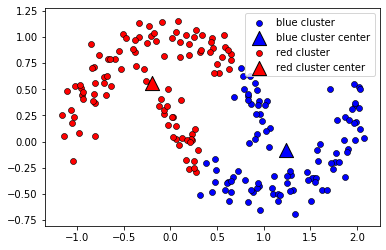

In [54]:
# complex shaped data
# fit
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_moon)
cluster_centers=kmeans.cluster_centers_
# plot
for i,col in enumerate(["blue","red"]):
    X_moon_now=X_moon[np.where(kmeans.predict(X_moon)==i)]
    plt.scatter(X_moon_now[:,0],X_moon_now[:,1],color=col,label="{:} cluster".format(col),
                alpha=1, linewidth=0.6,edgecolors="black")
    cluster_centers_now=cluster_centers[np.where(kmeans.predict(cluster_centers)==i)]
    plt.scatter(cluster_centers_now[:,0],cluster_centers_now[:,1],
                color=col, label="{:} cluster center".format(col), marker='^',s=200,linewidths=1,edgecolors='black')
plt.legend()

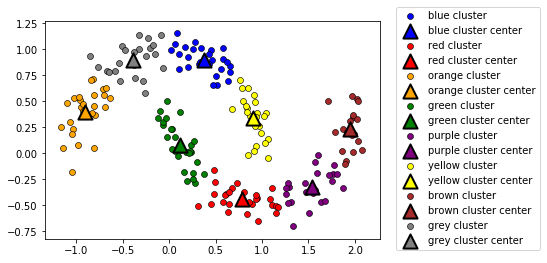

In [55]:
# can be partially resolved by increasing number of clusters

# complex shaped data
# fit
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_moon)
cluster_centers=kmeans.cluster_centers_
# plot
for i,col in enumerate(["blue","red","orange","green","purple","yellow","brown","grey"]):
    X_moon_now=X_moon[np.where(kmeans.predict(X_moon)==i)]
    plt.scatter(X_moon_now[:,0],X_moon_now[:,1],color=col,label="{:} cluster".format(col),
                alpha=1, linewidth=0.6,edgecolors="black")
    cluster_centers_now=cluster_centers[np.where(kmeans.predict(cluster_centers)==i)]
    plt.scatter(cluster_centers_now[:,0],cluster_centers_now[:,1],
                color=col, label="{:} cluster center".format(col), marker='^',s=200,linewidths=2,edgecolors='black')
plt.legend(loc=(1.05,-0.05))


### kmeans can also be used for image decomposition (vector quanitzation)

#### Its benefit is, that it can have more clusters than features, therefore offering more expressive representations

In [56]:
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed = kmeans.cluster_centers_[kmeans.predict(X_test)]

Text(0.5, 0.8, 'kmeans extracted components')

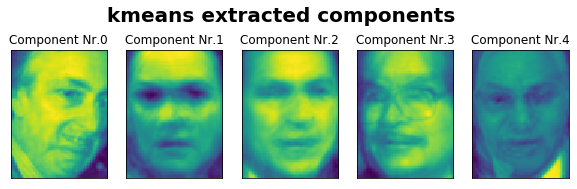

In [57]:
# show extracted components

fig,axes=plt.subplots(1, 5, figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})

for count, rec in enumerate(kmeans.cluster_centers_[:5]):
        image=np.reshape(rec,people_shape)
        axes[count].imshow(image,cmap='viridis')
        axes[count].set_title("Component Nr.{}".format(count))
fig.suptitle('kmeans extracted components', fontsize=20, fontweight='bold',y=.80)

Text(0.5, 0.8, 'original faces')

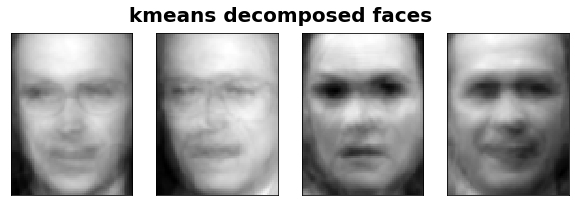

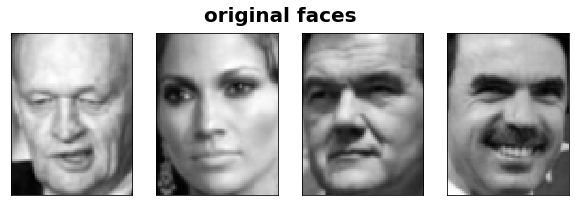

In [58]:
# reconstructed faces

show_faces=[0,1,3,4] # use more than one entry
fig,axes=plt.subplots(1, len(show_faces), figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})

for count, rec in enumerate(X_reconstructed[show_faces]):
        image=np.reshape(rec,people_shape)
        axes[count].imshow(image,cmap='gray')
fig.suptitle('kmeans decomposed faces', fontsize=20, fontweight='bold',y=.8)

fig,axes=plt.subplots(1, len(show_faces), figsize=(10, 5), subplot_kw={'xticks': (), 'yticks': ()})

for ori in range(len(show_faces)):
        image=np.reshape(X_test[show_faces[ori]],people_shape)
        axes[ori].imshow(image,cmap='gray')
fig.suptitle('original faces', fontsize=20, fontweight='bold',y=.8)

<a id='ch5'></a>
# 5. Agglomerative Clustering [return to overview](#main)

### Agglomerative Clustering works, by declaring all points their own cluster and iteritively merging the two closest cluster. The default method, ward, works by merging the points that increase the variance the least. Average merges the two clusters that have the least average distance between their points. complete linkage (also called maximum linkage), mergest the points with the smallest maximum distance between their points. Ward works for most datasets. If the number of clusters is very dissimilar, average or complete linkage should be employed.

### Its benefit is that the Dendogramm offers insight on how many clusters to choose

In [59]:
from sklearn.cluster import AgglomerativeClustering

# build the clustering model
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(blobs)
# the command is called fit_predict because agg can not predict new points. It can only label the given dataset

In [60]:
print("cluster membership:\n{}".format(assignment))

cluster membership:
[1 2 2 2 1 2 2 1 2 0 2 1 1 1 0 2 1 1 2 2 0 0 2 0 2 1 1 0 2 1 0 0 1 2 1 1 0
 0 0 1 1 1 0 0 2 2 0 2 1 2 0 1 2 1 2 1 2 1 0 0 0 2 0 0 2 0 1 2 0 2 2 1 0 2
 0 0 2 0 1 2 0 0 0 0 1 0 2 1 0 1 0 1 1 2 1 2 2 0 1 1]


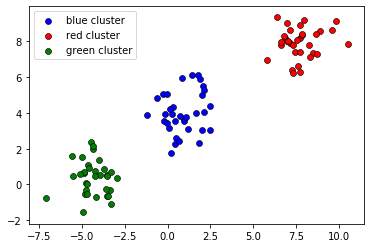

In [61]:
# plot
for i,col in enumerate(["blue","red","green"]):
    blobs_now=blobs[np.where(assignment==i)]
    plt.scatter(blobs_now[:,0],blobs_now[:,1],color=col,label="{:} cluster".format(col),
                alpha=1,linewidth=0.6,edgecolors="black")
plt.legend()

#### Dendogramm for picturing clustering process

Text(0, 0.5, 'Cluster distance')

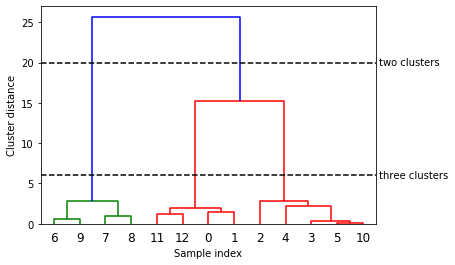

In [62]:
# Import dendrogram function and ward clustering function
from scipy.cluster.hierarchy import dendrogram, ward
# ward function returns array with distances
linkage_array = ward(few_blobs)
# Now we plot the dendrogram for the linkage_array containing the distances
dendrogram(linkage_array)

# mark cuts that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [20, 20], '--', c='k')
ax.plot(bounds, [6, 6], '--', c='k')

ax.text(bounds[1], 20, ' two clusters', va='center', fontdict={'size': 10})
ax.text(bounds[1], 6, ' three clusters', va='center', fontdict={'size': 10})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

###  Now let's look into an algorithm that can cluster complex shapes

<a id='ch6'></a>
# 6. DBSCAN [return to overview](#main)

### Works by indentifying crowded regions in feature space. Can identify points as noise. Requires two paramters, min_samples and eps to finetune. Works on complex shapes

### Downsides are, that it isn't as fast as Kmeans or Agglomerative Clustering and scales worse with large datasets, though it still performs reasonably well.

### Sometimes it's easier to tune parameters after rescaling data (for example by MinMaxScaler or StandardScaler)

In [63]:
# import
from sklearn.cluster import DBSCAN
# apply
dbscan = DBSCAN()
clusters = dbscan.fit_predict(few_blobs)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


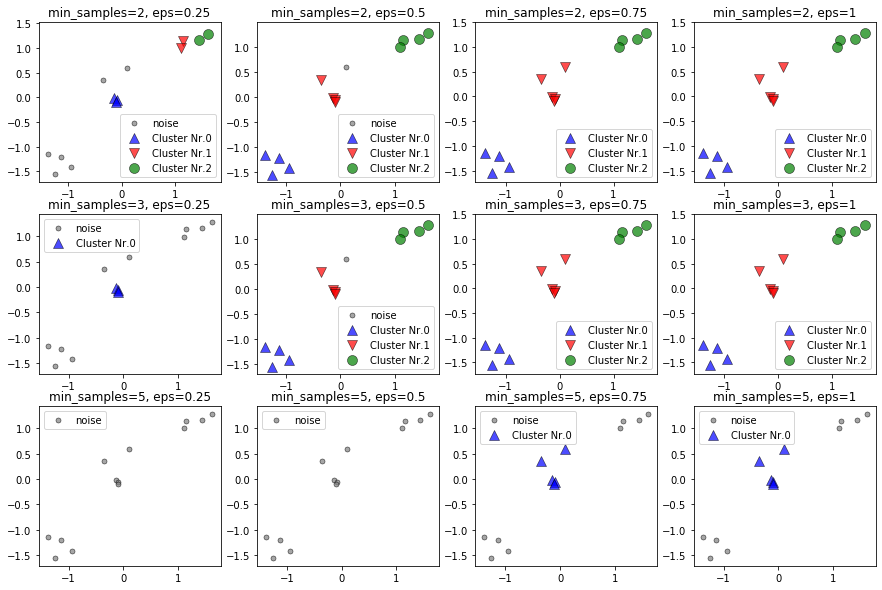

In [96]:
# Demonstration on how DBSCAN paramters set clustering

# rescale
# scale to mean=0, std=1
scaler = StandardScaler()
# fit scaling
scaler.fit(few_blobs)
# apply scaling
scaled_few_blobs=scaler.transform(few_blobs)

#define eps and min_samples
eps_list=[0.25,0.5,0.75,1]
min_samples_list=[2,3,5]
# plot_values
colors=["blue","red","green"]
markers=["^","v","o"]
noise_color="gray"
noise_marker="."
         
#plot
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
#plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i,samp in enumerate(min_samples_list):
    for j,epss in enumerate(eps_list):
        dbscan = DBSCAN(min_samples=samp,eps=epss)
        clusters = dbscan.fit_predict(scaled_few_blobs)
        axes[i,j].set_title("min_samples={}, eps={}".format(samp,epss))
        for uni in np.unique(clusters):
            scaled_few_blobs_now=scaled_few_blobs[np.where(clusters==uni)]
            if uni==-1:
                lab="noise"
                color=noise_color
                marker=noise_marker
            else:
                lab="Cluster Nr.{}".format(uni)
                color=colors[uni]
                marker=markers[uni]
                
            axes[i,j].scatter(scaled_few_blobs_now[:,0],scaled_few_blobs_now[:,1],color=color,marker=marker,
                              label=lab, alpha=0.7, linewidth=0.6, s=100, edgecolors="black")
            axes[i,j].legend()

### Now let's see how dbscan works on the moon dataset

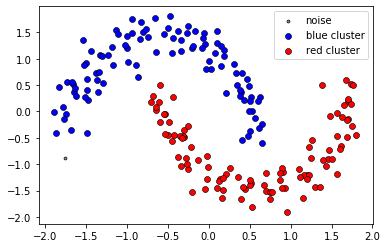

In [153]:
# clustering params
min_samp=10
eps=0.45
# plot parameters
colors=["blue","red"]
noise_color="gray"
noise_marker="."
# rescaling
scaler = StandardScaler()
# fit scaling
scaler.fit(X_moon)
# apply scaling
scaled_X_moon=scaler.transform(X_moon)


# complex shaped data
# fit
dbscan = DBSCAN(min_samples=min_samp,eps=eps)
clusters = dbscan.fit_predict(scaled_X_moon)

# plot
for uni in np.unique(clusters):
    scaled_X_moon_now=scaled_X_moon[np.where(clusters==uni)]
    if uni==-1:
        lab="noise"
        col=noise_color
        mark=noise_marker
    else:
        col=colors[uni]
        lab=label="{:} cluster".format(col)
        mark="o"
    plt.scatter(scaled_X_moon_now[:,0],scaled_X_moon_now[:,1],color=col,marker=mark,label=lab,
                alpha=1, linewidth=0.6,edgecolors="black")
plt.legend()


In [114]:
clusters

array([ 0,  1,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  1,  0,  0,  0,
        1,  0,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,
        1,  1,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,
        0,  0,  0,  1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,
        1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,
        0,  1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  1,
        0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  1], dtype=int64)

In [101]:
X_moon_now=X_moon[np.where(dbscan.fit_predict==uni)]
X_moon

array([[ 7.92357355e-01,  5.02648573e-01],
       [ 1.63158315e+00, -4.63896705e-01],
       [-6.71092674e-02,  2.67767057e-01],
       [-1.04412427e+00, -1.82607610e-01],
       [ 1.76704822e+00, -1.98609868e-01],
       [ 1.90607398e+00, -7.10915927e-02],
       [ 9.62192129e-01,  2.61986075e-01],
       [ 8.86813848e-01, -4.84896235e-01],
       [ 8.68935196e-01,  3.61092776e-01],
       [ 1.15352953e+00, -5.72352929e-01],
       [-3.70714493e-01,  7.21655833e-01],
       [ 1.95523229e-01, -2.64439358e-01],
       [ 1.80949658e+00, -1.94707885e-01],
       [ 1.29046617e+00, -3.23893778e-01],
       [-8.23662620e-01,  7.17643700e-01],
       [ 9.85881879e-01,  1.96706218e-01],
       [ 5.81943503e-01,  9.06311048e-01],
       [ 2.76118902e-01, -2.87451069e-01],
       [ 3.17284813e-01,  8.54200996e-01],
       [-8.52697952e-01,  9.32383274e-01],
       [ 1.97796688e+00,  1.04796611e-02],
       [ 8.64249290e-01, -4.63242870e-01],
       [ 2.57499053e-01,  1.00362573e+00],
       [ 1.

<a id='ch7'></a>
# 7. Support vector machines [return to overview](#main)

<a id='ch8'></a>
# 8. Neural Networks (deep learning) [return to overview](#main)